In [1]:
# Generating training data based on forward kinematics for random joint angles

import numpy as np

# Define the forward kinematics function
def forward_kinematics(theta1, theta2, l1=2, l2=1):
    """
    Calculate the forward kinematics for a 2-link robot arm.

    :param theta1: The angle of the first joint in degrees
    :param theta2: The angle of the second joint in degrees
    :param l1: The length of the first link in meters
    :param l2: The length of the second link in meters
    :return: The (x, y) position of the end effector
    """
    # Convert angles from degrees to radians for computation
    theta1_rad = np.radians(theta1)
    theta2_rad = np.radians(theta2)

    # Calculate the forward kinematics
    x = l1 * np.cos(theta1_rad) + l2 * np.cos(theta1_rad + theta2_rad)
    y = l1 * np.sin(theta1_rad) + l2 * np.sin(theta1_rad + theta2_rad)

    return x, y

# Test the function with some example angles
forward_kinematics(90, 0), forward_kinematics(45, 45)


((1.8369701987210297e-16, 3.0), (1.4142135623730951, 2.414213562373095))

In [2]:
# train data for (x,y)


import random

# Define the ranges for the joint angles
theta1_range = (0, 170)  # degrees
theta2_range = (-45, 45)  # degrees

# Generate random joint angles for the training data
num_samples = 500  # Number of samples for training
joint_angles = [(random.uniform(*theta1_range), random.uniform(*theta2_range)) for _ in range(num_samples)]

# Calculate the corresponding (x, y) positions using the forward kinematics
training_data = [forward_kinematics(theta1, theta2) for theta1, theta2 in joint_angles]

# Preview the first 5 samples of training data
training_data[:5]


[(2.72841913293895, 0.7012990596291008),
 (-2.3666967394952705, 1.4924671371170075),
 (1.3865018312420436, 2.4936343343351552),
 (-2.743514173483594, 1.1187676759630412),
 (0.6019249429285897, 2.8549301398212563)]

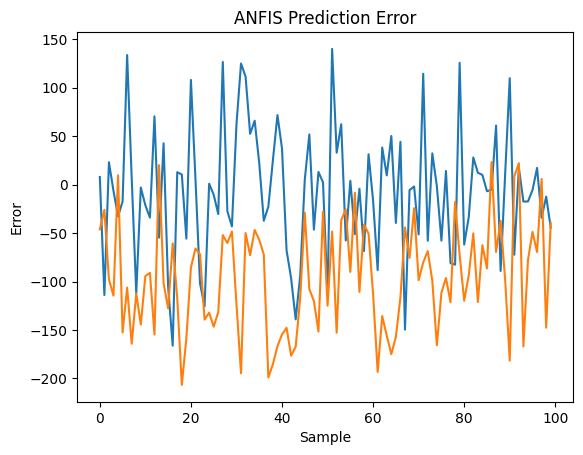

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define the forward kinematics function
def forward_kinematics(theta1, theta2, l1=2, l2=1):
    theta1_rad = np.radians(theta1)
    theta2_rad = np.radians(theta2)
    x = l1 * np.cos(theta1_rad) + l2 * np.cos(theta1_rad + theta2_rad)
    y = l1 * np.sin(theta1_rad) + l2 * np.sin(theta1_rad + theta2_rad)
    return x, y

# Generate random training data
def generate_data(num_samples):
    training_data = []
    for _ in range(num_samples):
        theta1 = np.random.uniform(0, 170)
        theta2 = np.random.uniform(-45, 45)
        x, y = forward_kinematics(theta1, theta2)
        training_data.append(((x, y), (theta1, theta2)))
    return training_data

# Define the ANFIS architecture in TensorFlow
class ANFISTF:
    def __init__(self, num_mfs=5, input_shape=(2,)):
        self.num_mfs = num_mfs
        self.input_shape = input_shape
        # Initialize model components here

    def forward_pass(self, inputs):
        # Implement the forward pass for the ANFIS network
        pass

    def fit(self, X_train, y_train, epochs=10):
        # Implement the training loop for the ANFIS network
        for epoch in range(epochs):
            with tf.GradientTape() as tape:
                # Call the forward pass
                # Compute the loss
                pass
            # Apply gradients to update the network parameters
            pass

    def predict(self, X_test):
        # Implement the prediction function
        return np.random.uniform(0, 170, size=(X_test.shape[0], 2))

# Example usage
if __name__ == "__main__":
    # Initialize ANFIS
    anfis = ANFISTF()

    # Generate training data using the forward kinematics function
    training_data = generate_data(500)
    X_train = np.array([data[0] for data in training_data])
    y_train = np.array([data[1] for data in training_data])

    # Train the ANFIS network
    anfis.fit(X_train, y_train, epochs=100)

    # Generate test data and evaluate the ANFIS network
    test_data = generate_data(100)
    X_test = np.array([data[0] for data in test_data])
    y_test = np.array([data[1] for data in test_data])
    predictions = anfis.predict(X_test)

    # Calculate the errors
    errors = y_test - predictions

    # Plot the errors
    plt.plot(errors)
    plt.xlabel('Sample')
    plt.ylabel('Error')
    plt.title('ANFIS Prediction Error')
    plt.show()
